In [4]:
from lab1.runners import *
from lab1.benchmark import BenchmarkResult
from numpy import cos
from numpy import exp
from numpy import pi

In [ ]:
%load_ext autoreload
%autoreload 2

### Сравнение методов

In [ ]:
def f(x: float, y: float) -> float:
    # return x ** 3 * y ** 5 * (4 - x - 7 * y)
    # return scipy.optimize.rosen((x, y))
    return (x - 1) ** 2 + y ** 2
    # return x ** 2 + y ** 2

    # TARGET = Vector(4 / 3, 20 / 63)

In [3]:
TARGET = Vector(1, 0)
PROBLEM = Oracle(f, TARGET)
b = BenchmarkResult.compare(RunnerMeta.runners, dict(
    o=PROBLEM,
    start=Vector(2, 1),
    a=Coef.CONST(0.0001),
    exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
))

--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


In [4]:
b.top("accuracy", "time", "queries")

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendImprovedRunner | 0.00000000 |       175 | 0.00077760 |
| CoordinateDescendRunner         | 0.00000000 |    140009 | 1.93697680 |
| CoordinateGradientRunner        | 0.00000011 |       133 | 0.00159020 |
| NelderMeadRunner                | 0.00446726 |        73 | 0.00242030 |
| GradientDescendRunner           | 0.04991037 |     83565 | 0.68203140 |

sorted by time
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendImprovedRunner | 0.00000000 |       175 | 0.00077760 |
| CoordinateGradientRunner        | 0.00000011 |       133 | 0.00159020 |
| NelderMeadRunner                | 0.00446726 |        73 | 0.00242030 |
| GradientDescendRunner           | 0.04991037 |     83565 | 0.68203140 |
| C

На простом случае в среднем самым эффективным оказывается `CoordinateDescendImprovedRunner`
Посмотрим на более интересные функции

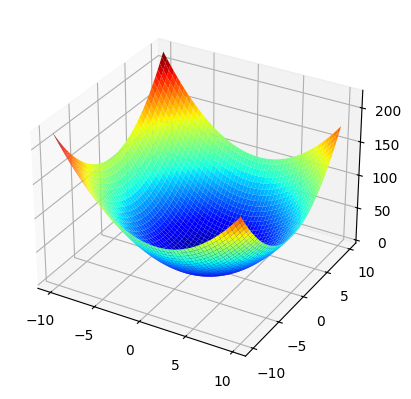

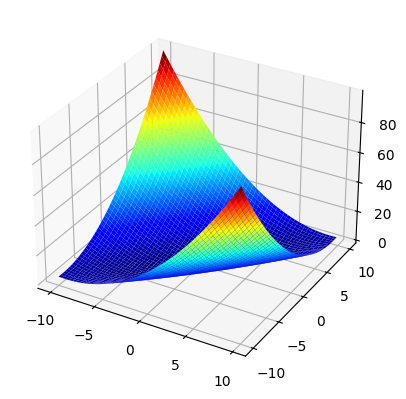

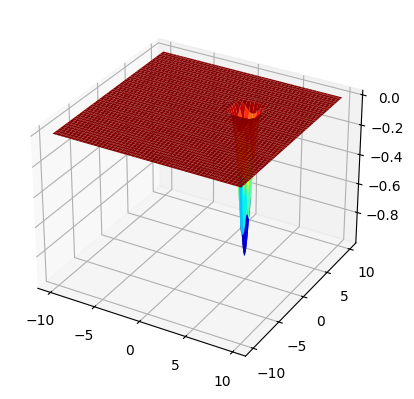

In [5]:
from numpy import cos
from numpy import exp
from numpy import pi


def f1(x, y):
    return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y


def f2(x, y):
    return -cos(x) * cos(y) * exp(-((x - pi) ** 2 + (y - pi) ** 2))


plot(f)
plot(f1)
plot(f2)

In [12]:
fs = [f, f1, f2]

_params_base = dict(
    start=Vector(*([3] * 2)),
    a=Coef.CONST(0.0001),
    exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
)

params = [
    dict(**_params_base, o=Oracle(f, Vector(1, 0))),
    dict(**_params_base, o=Oracle(f1, Vector(0, 0))),
    dict(**_params_base, o=Oracle(f2, Vector(pi, pi))),
]
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


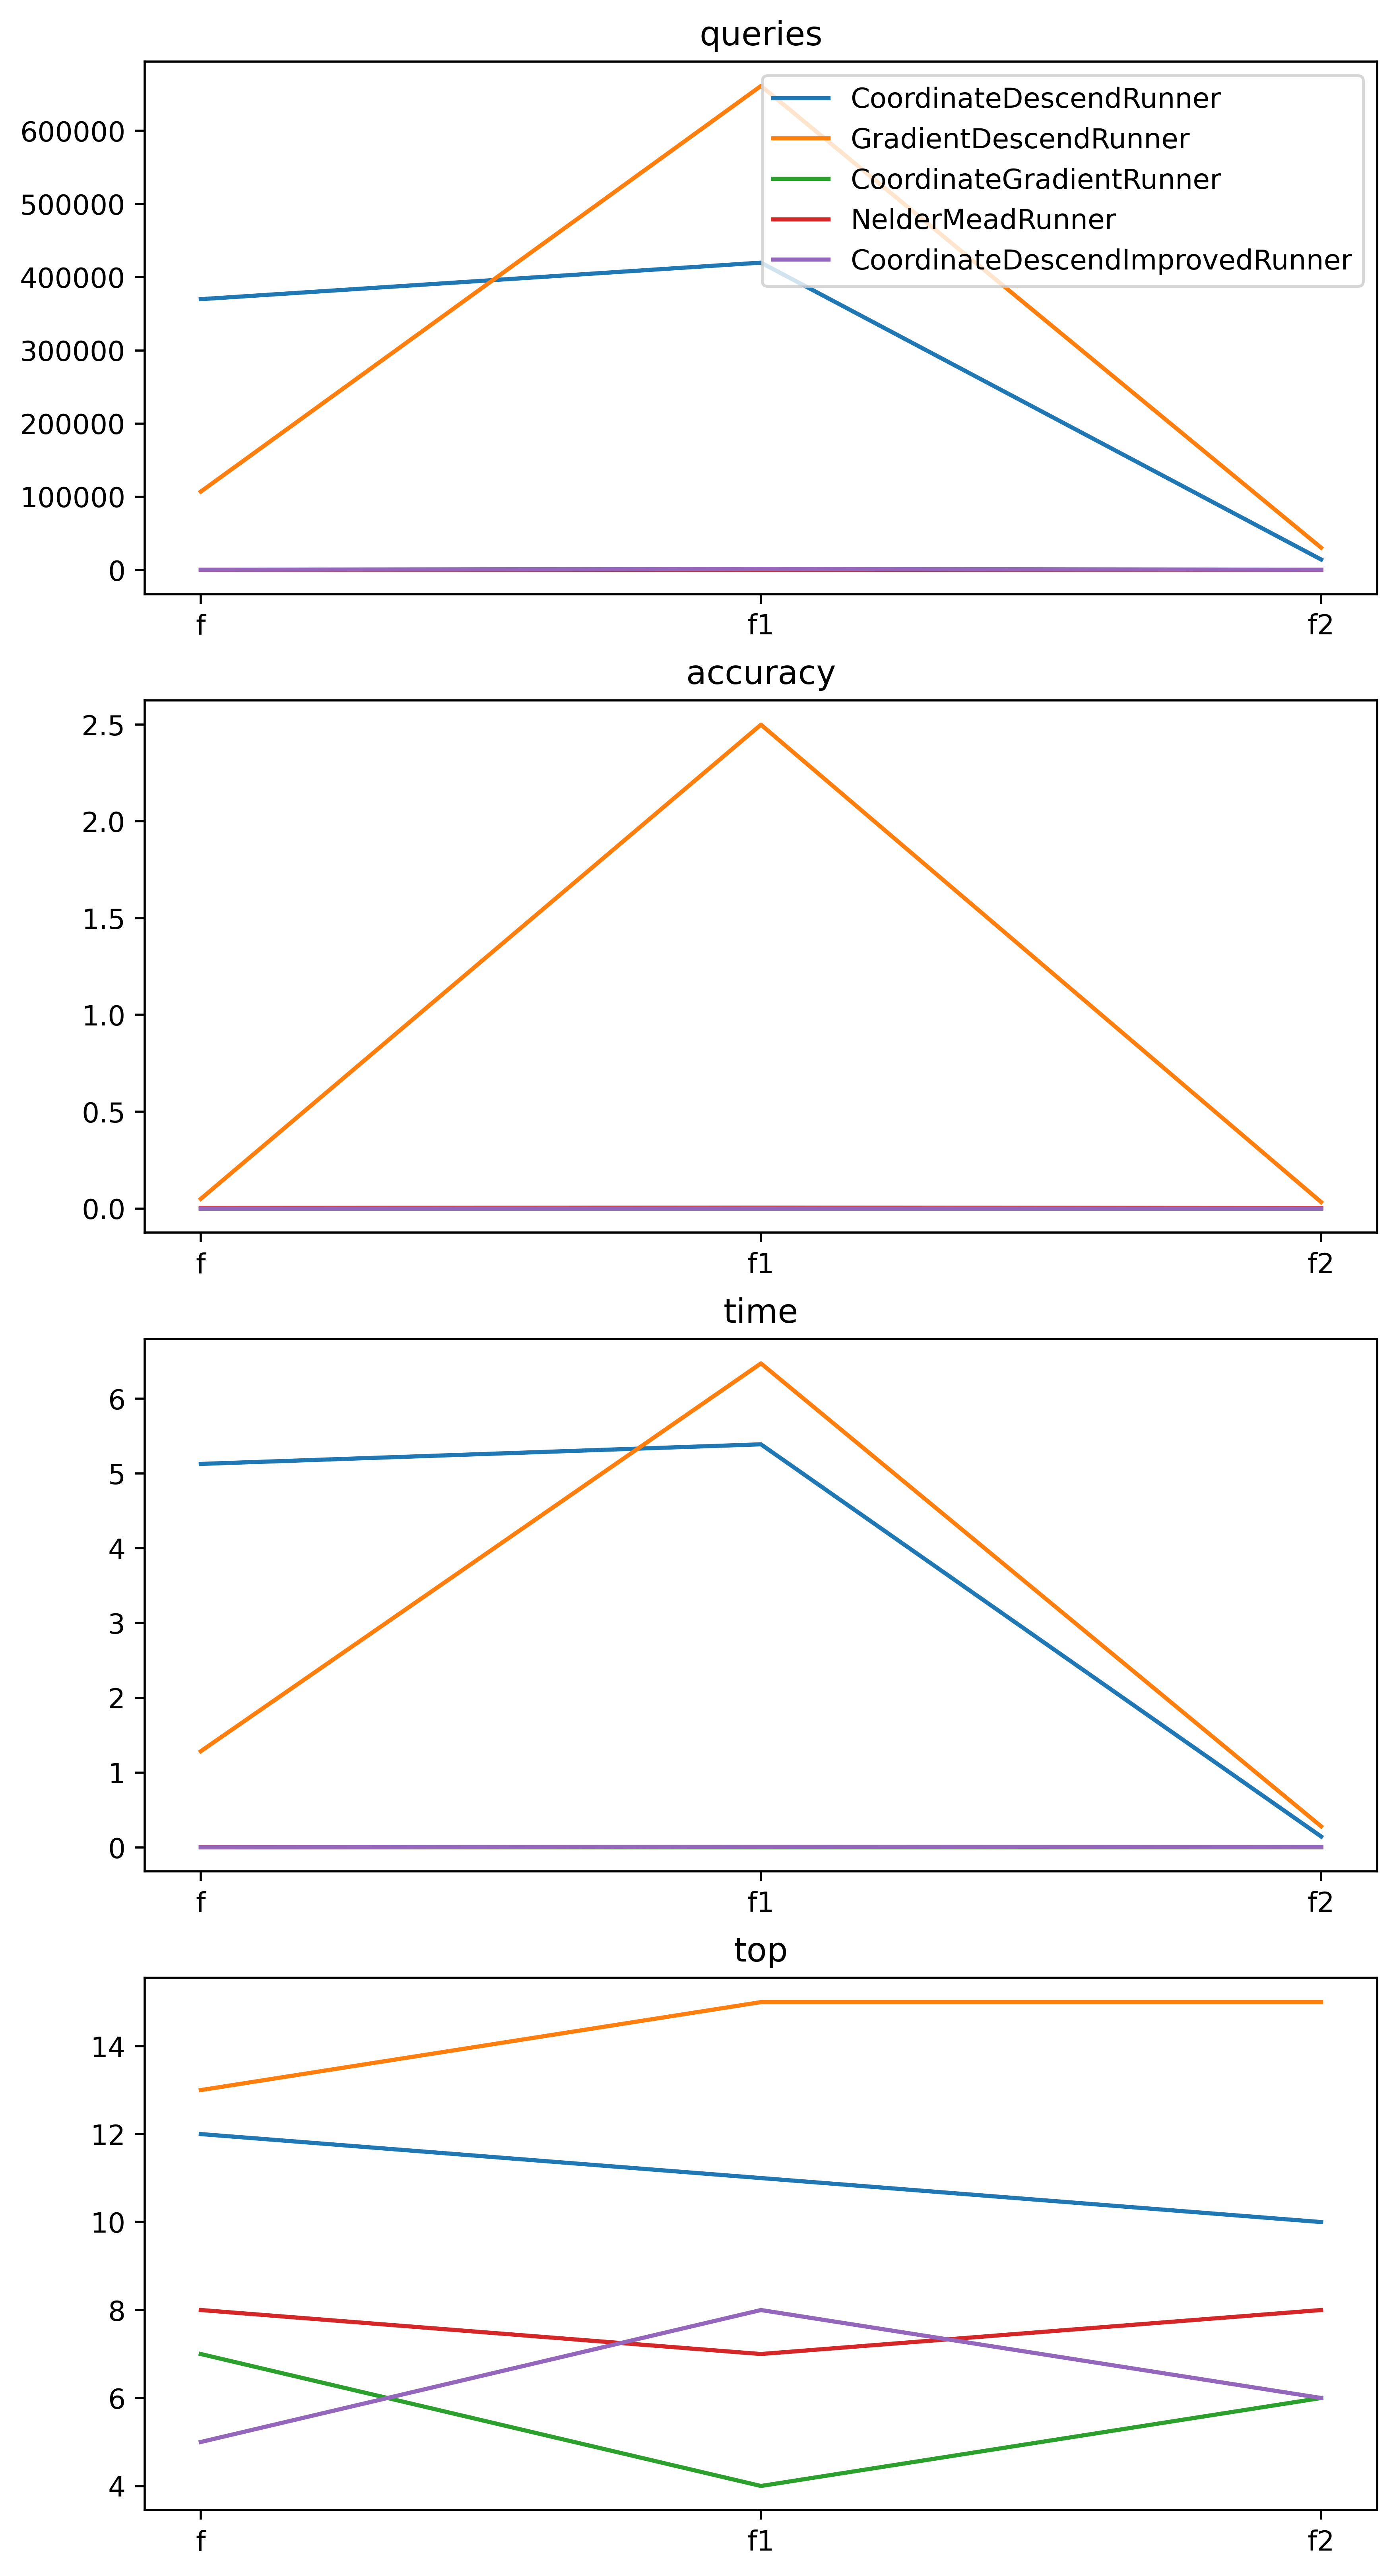

In [15]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time", "top"), names=list(map(lambda el: el.__name__, fs)))

`GradientDescendRunner` не справился со 2 функцией
В среднем `CoordinateDescendImprovedRunner` и `CoordinateGradientRunner` лидируют

### N-мерные пространства

In [17]:
ns = range(2, 11)

params = []
for n in ns:
    def f(*args):
        return sum(map(lambda a: a ** 2, args))


    TARGET = Vector(*([0] * n))
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=Coef.CONST(0.0001),
        exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)



running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

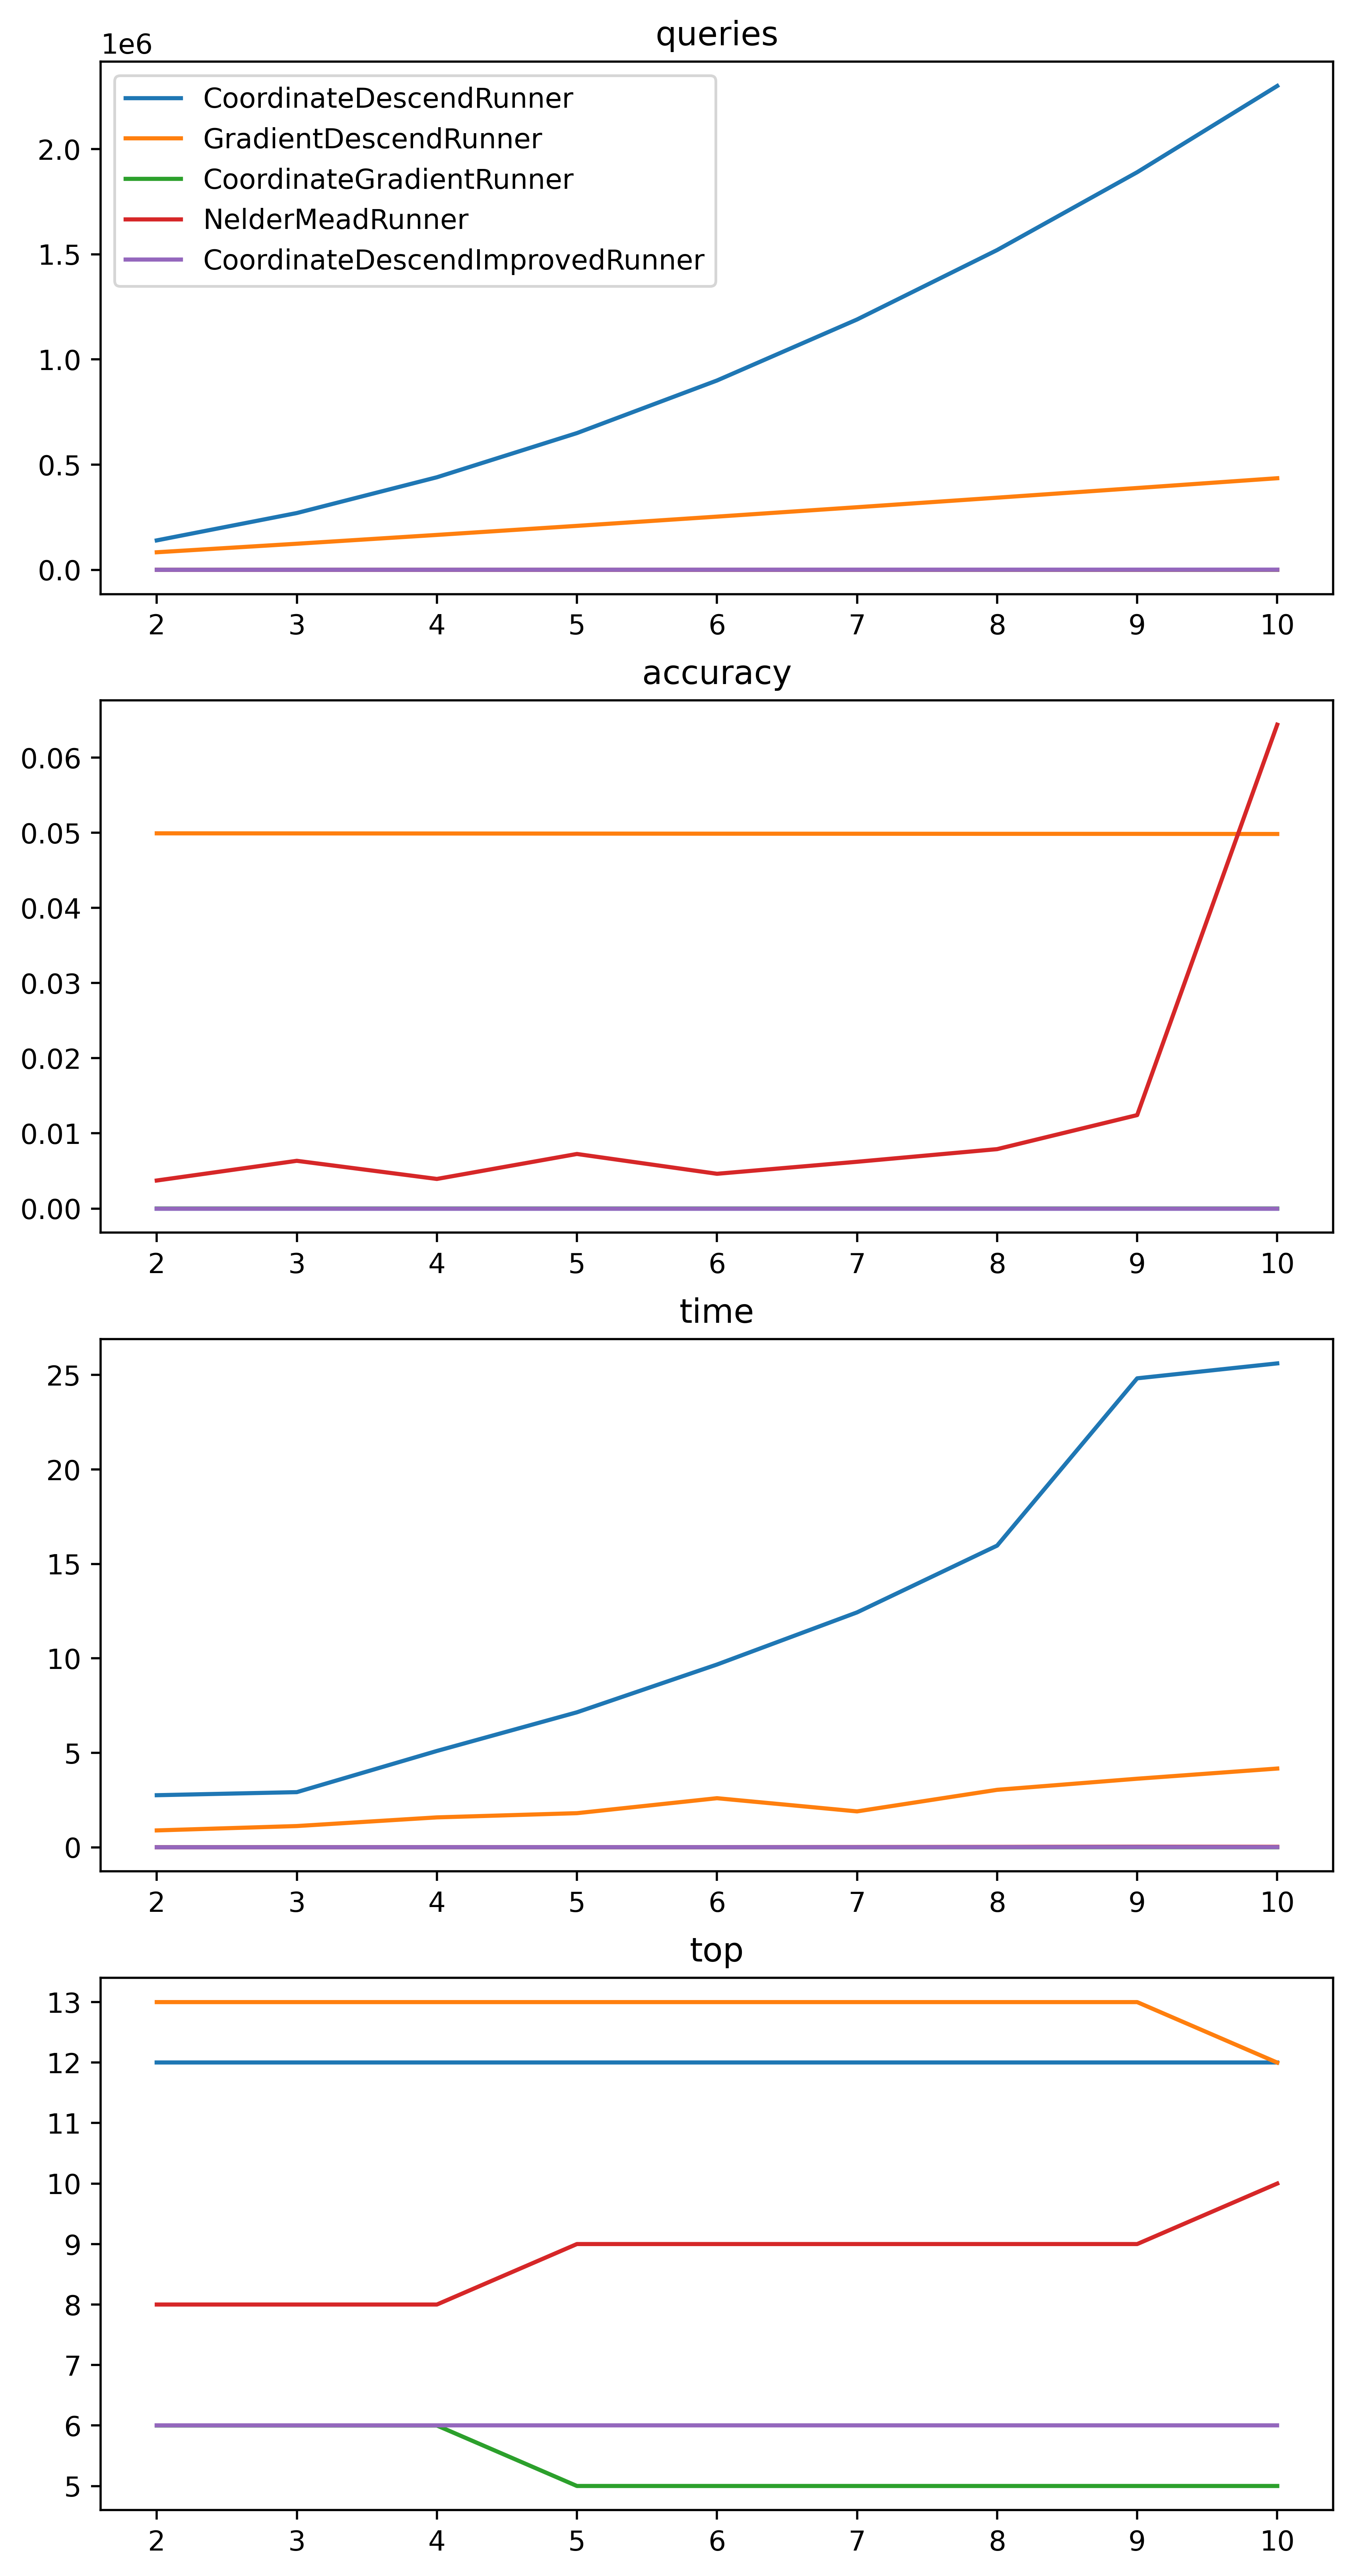

In [18]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time", "top"), names=list(map(str, ns)))

`CoordinateDescendRunner` и `GradientDescendRunner` оказались не очень устойчивыми к увеличению размерности пространства (1 показал себя отвратительно)
Посмотрим на оставшиеся поближе

running experiment 1
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running CoordinateGradientRunner
running experiment 2
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running CoordinateGradientRunner
running experiment 3
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running CoordinateGradientRunner
running experiment 4
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running CoordinateGradientRunner
running experiment 5
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running CoordinateGradientRunner
running experiment 6
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running CoordinateGradientRunner
running experiment 7
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running CoordinateGradientRunner
running experiment 8
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running CoordinateGradientRunner
running experiment 9
running NelderMeadRunner
ru

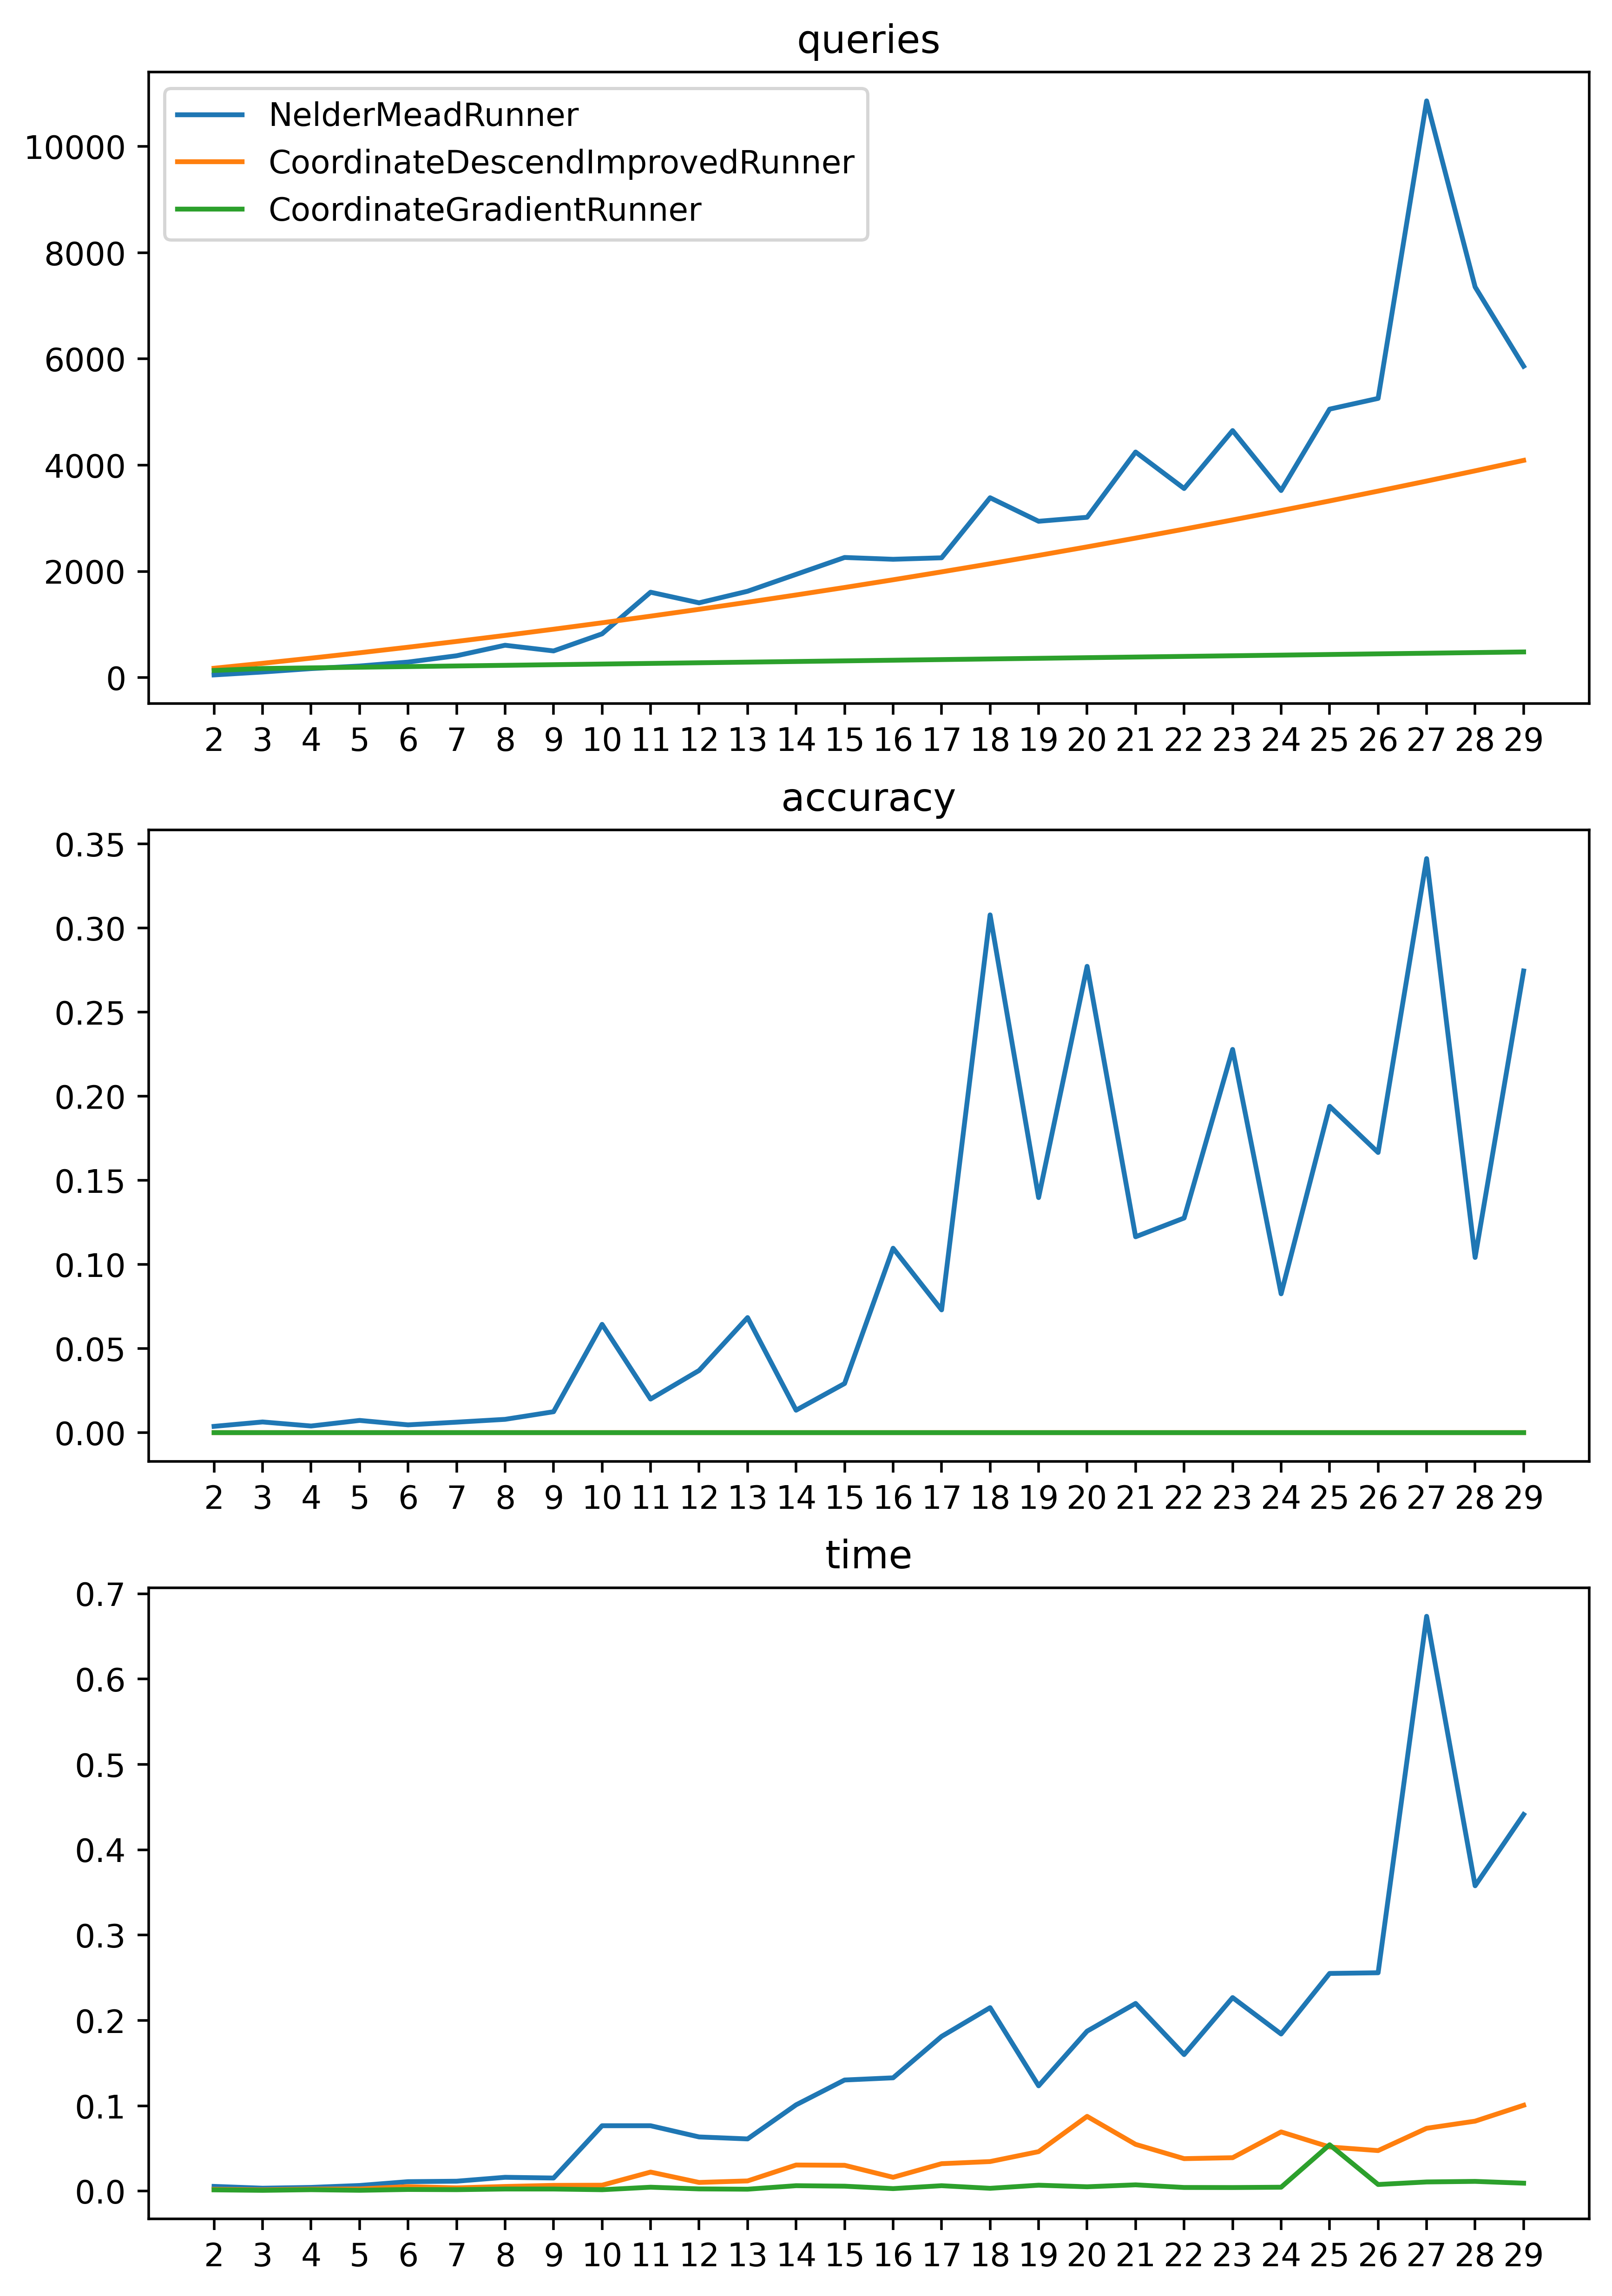

In [6]:
ns = range(2, 30)

params = []
for n in ns:
    def f(*args):
        return sum(map(lambda a: a ** 2, args))


    TARGET = Vector(*([0] * n))
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=Coef.CONST(0.0001),
        exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series((NelderMeadRunner, CoordinateDescendImprovedRunner, CoordinateGradientRunner), params)

BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, ns)))

`CoordinateGradientRunner` оказался самым эффективным в многомерных пространствах, `CoordinateDescendImprovedRunner` показывает себя чуть хуже

### Зашумленные значения

running experiment 1
running CoordinateDescendRunner
running GradientDescendRunner
running CoordinateGradientRunner
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 2
running CoordinateDescendRunner
running GradientDescendRunner
running CoordinateGradientRunner
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 3
running CoordinateDescendRunner
running GradientDescendRunner
running CoordinateGradientRunner
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 4
running CoordinateDescendRunner
running GradientDescendRunner
running CoordinateGradientRunner
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 5
running CoordinateDescendRunner
running GradientDescendRunner
running CoordinateGradientRunner
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 6
running CoordinateDescendRunner
running GradientDescendRunner
running Coor

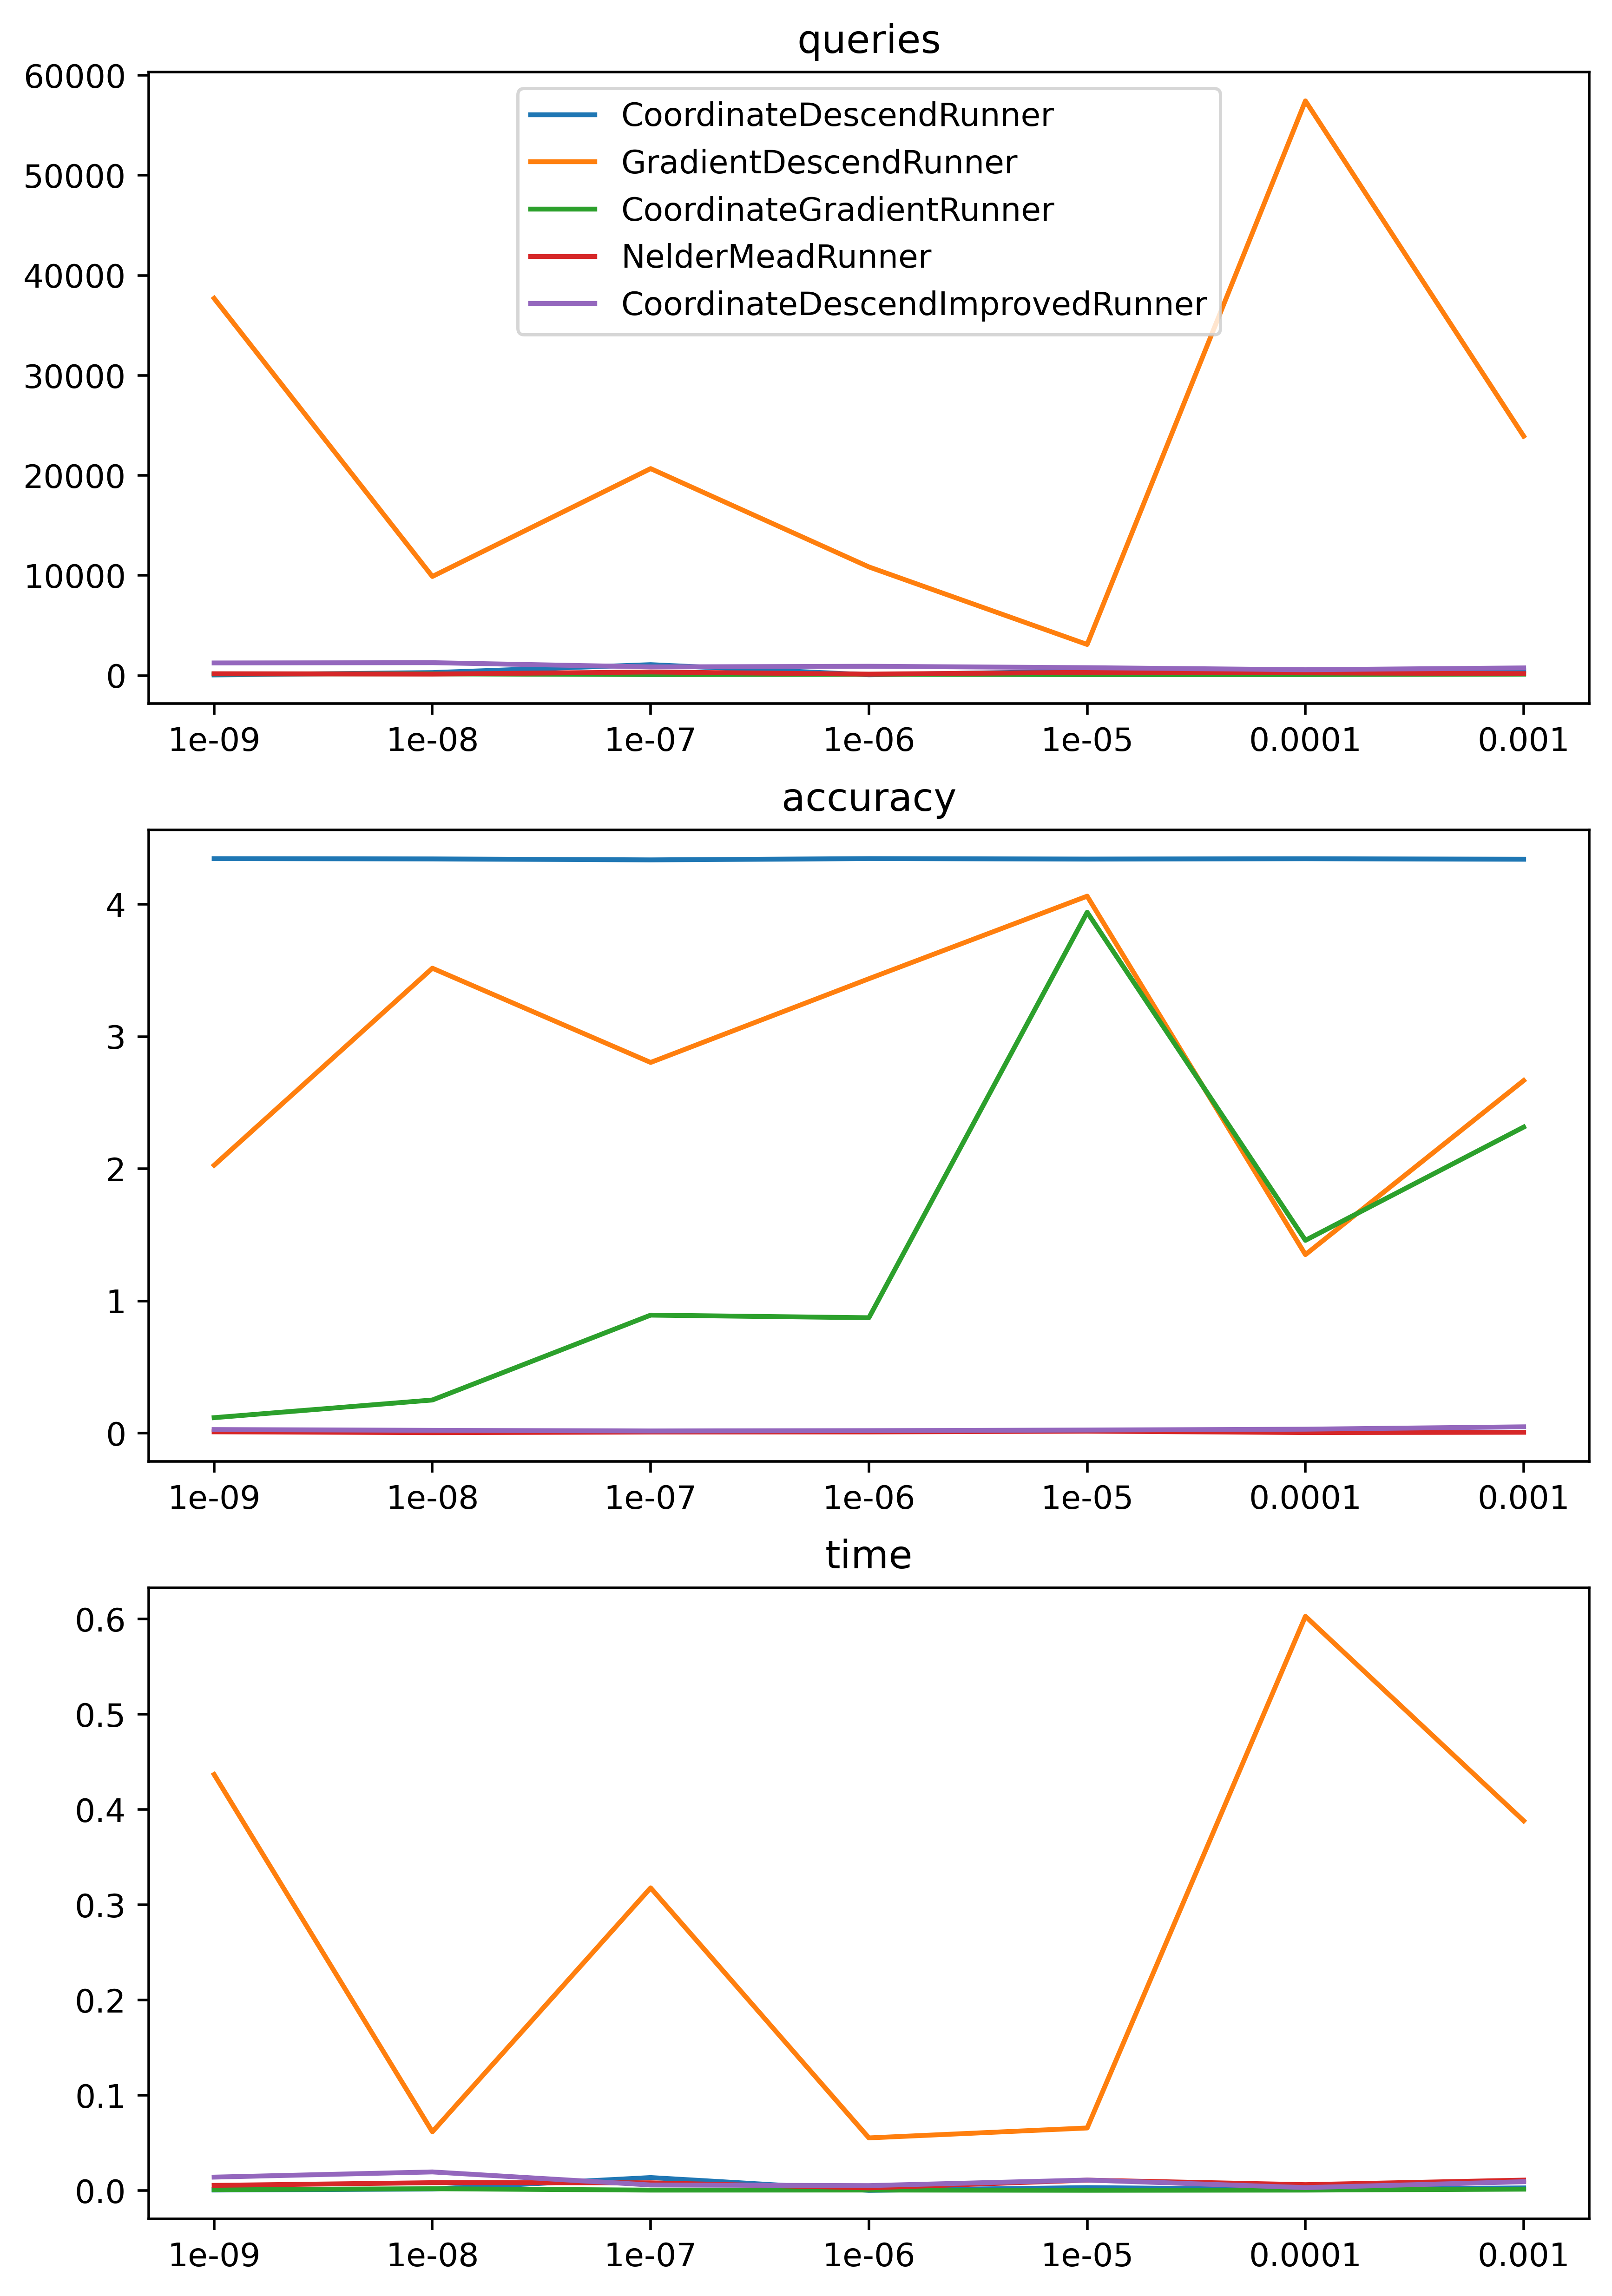

In [14]:
import random


def eps(mx):
    r = random.randint(0, 1000)
    return (-1 ** r) * r / 1000 * mx


mxs = list(reversed([10 ** (-i) for i in range(3, 10)]))

params = []
n = 2


def f(x, y):
    return (x - 2) ** 2 + (y + 1) ** 2 + x * y + eps(mx)


for mx in mxs:
    TARGET = Vector(10 / 3, -8 / 3)
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=Coef.CONST(0.0001),
        exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)

BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, mxs)))

Устойчивыми к шуму оказались `NelderMeadRunner` и `CoordinateDescendImprovedRunner` посмотрим на них ближе

running experiment 1
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 2
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 3
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 4
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 5
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 6
running NelderMeadRunner
running CoordinateDescendImprovedRunner
running experiment 7
running NelderMeadRunner
running CoordinateDescendImprovedRunner


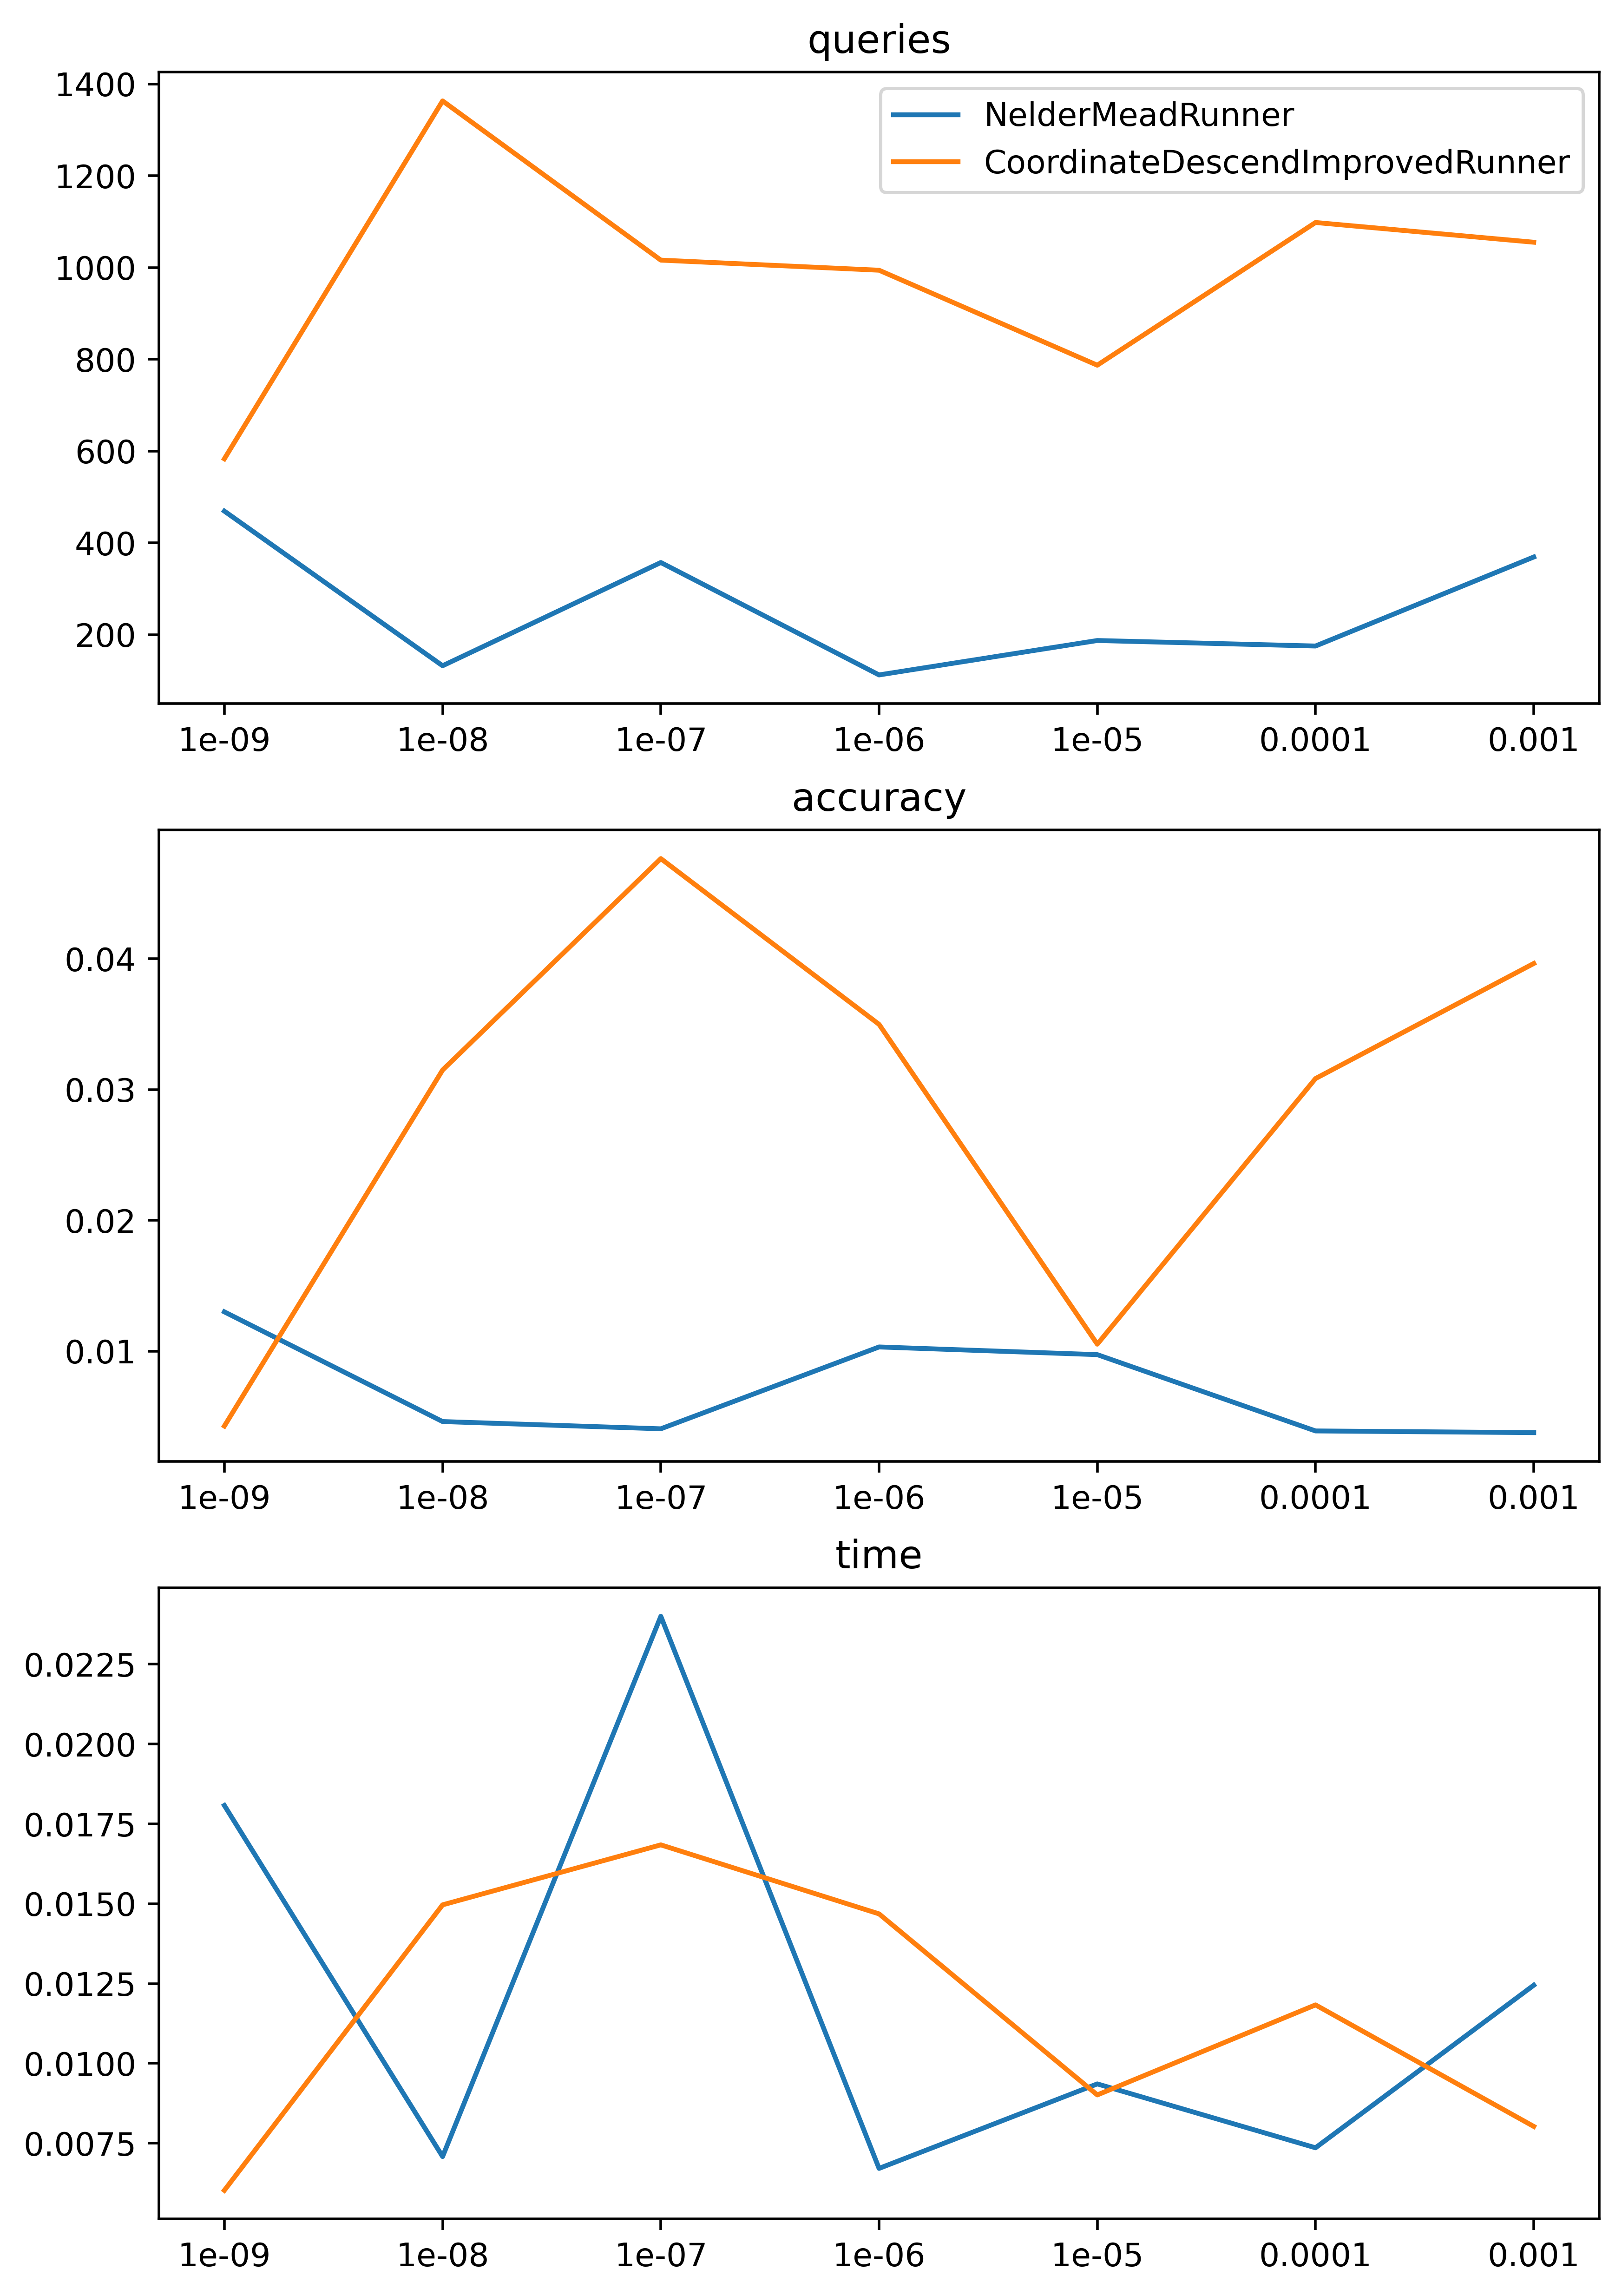

In [17]:
bs = BenchmarkResult.series((NelderMeadRunner, CoordinateDescendImprovedRunner), params)
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, mxs)))

Результаты разнятся от запуска к запуску, но в среднем `NelderMeadRunner` оказывается чуть лучше

### мультимодальные функции

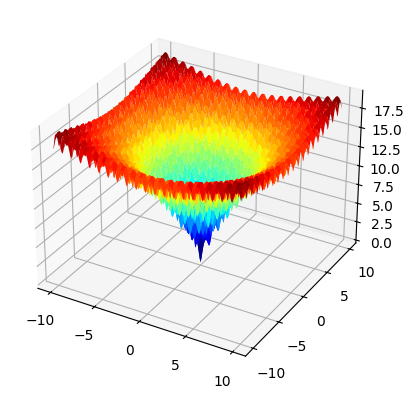

In [5]:
def m1(x, y):
    return -20.0 * exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) - exp(
        0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + np.e + 20


plot(m1)

In [28]:
# for mx in mxs:
#     TARGET = Vector(10 / 3, -8 / 3)
#     params.append(dict(
#         o=Oracle(f, TARGET),
#         start=Vector(*([1] * n)),
#         a=Coef.CONST(0.0001),
#         exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
#     ))
# (GradientDescendRunner, CoordinateGradientRunner)
b = BenchmarkResult.compare(RunnerMeta.runners, dict(
    o=Oracle(m1, Vector(0, 0)),
    start=Vector(3, 3),
    a=Coef.CONST(0.0001),
    exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
))

# BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, mxs)))

--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


In [29]:
b.top("queries", "accuracy", "time")

sorted by queries
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| NelderMeadRunner                | 4.21158218 |        74 | 0.00257400 |
| CoordinateGradientRunner        | 4.21325888 |       127 | 0.00232900 |
| CoordinateDescendImprovedRunner | 0.00000000 |       203 | 0.00186300 |
| GradientDescendRunner           | 4.21510117 |      2620 | 0.03894930 |
| CoordinateDescendRunner         | 4.21322505 |      2921 | 0.04562690 |

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendImprovedRunner | 0.00000000 |       203 | 0.00186300 |
| NelderMeadRunner                | 4.21158218 |        74 | 0.00257400 |
| CoordinateDescendRunner         | 4.21322505 |      2921 | 0.04562690 |
| CoordinateGradientRunner        | 4.21325888 |       127 | 0.00232900 |


Справился только `CoordinateDescendImprovedRunner`
посмотрим, что будет если менять точку старта

In [8]:
points = [Vector(i, i * (-1) ** i) for i in range(1, 10)]
TARGET = Vector(0, 0)
params = []
for p in points:
    params.append(dict(
        o=Oracle(m1, TARGET),
        start=p,
        a=Coef.CONST(0.0001),
        exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

sorted by accuracy
| name                            |    accuracy |   queries |       time |
|---------------------------------+-------------+-----------+------------|
| CoordinateDescendImprovedRunner |  0.00000000 |       269 | 0.00596500 |
| CoordinateDescendRunner         | 12.71915394 |       753 | 0.01584820 |
| CoordinateGradientRunner        | 12.71918937 |       102 | 0.00238400 |
| GradientDescendRunner           | 12.72104236 |      1450 | 0.02898450 |
| NelderMeadRunner                | 12.72252530 |        96 | 0.00589780 |


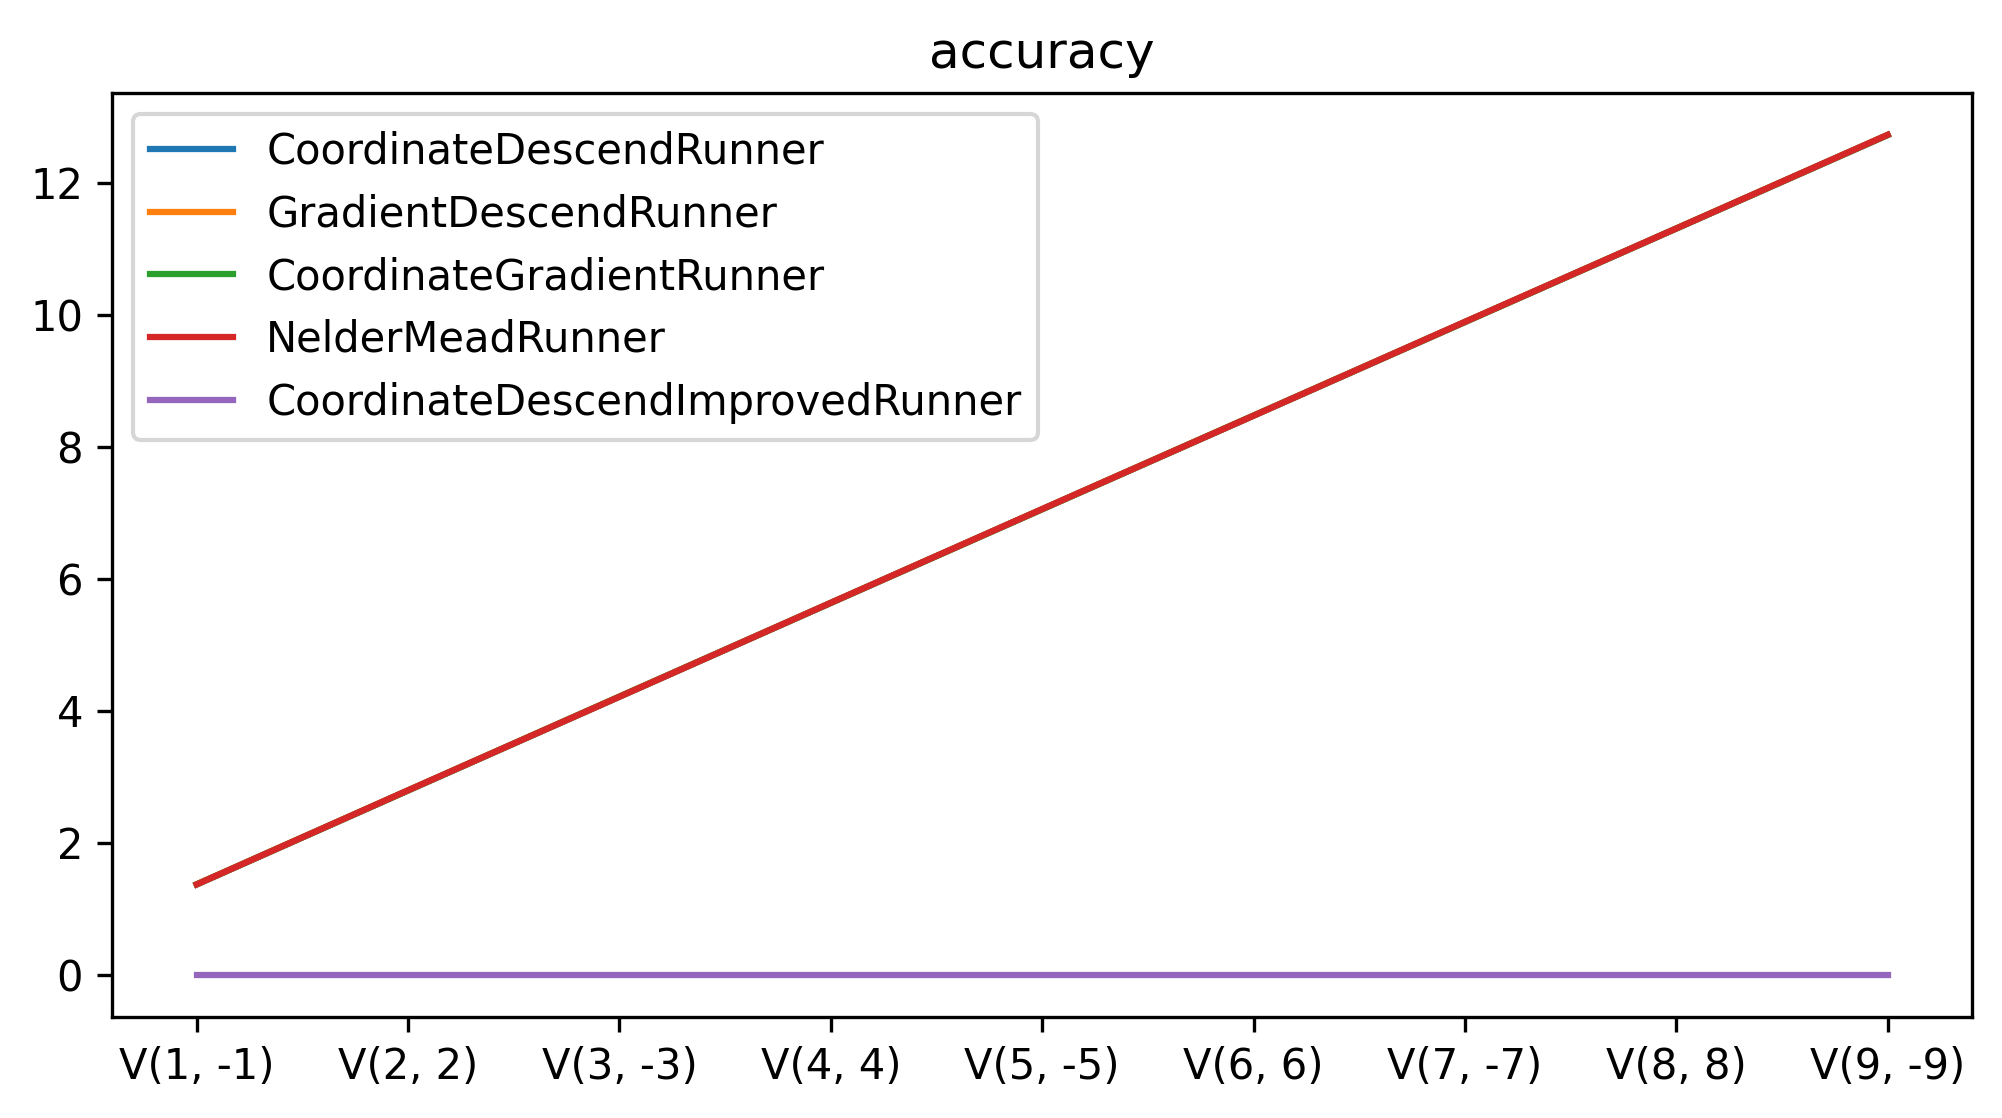

In [9]:
bs[-1].top("accuracy", total=False)
BenchmarkResult.plot_results(bs, ("accuracy",), names=list(map(str, points)))

Справляется только `CoordinateDescendImprovedRunner`

Точность (расстояние до реального минимума): 0.00000000
Кол-во запросов к оракулу: 269
Время: 0.0036 с


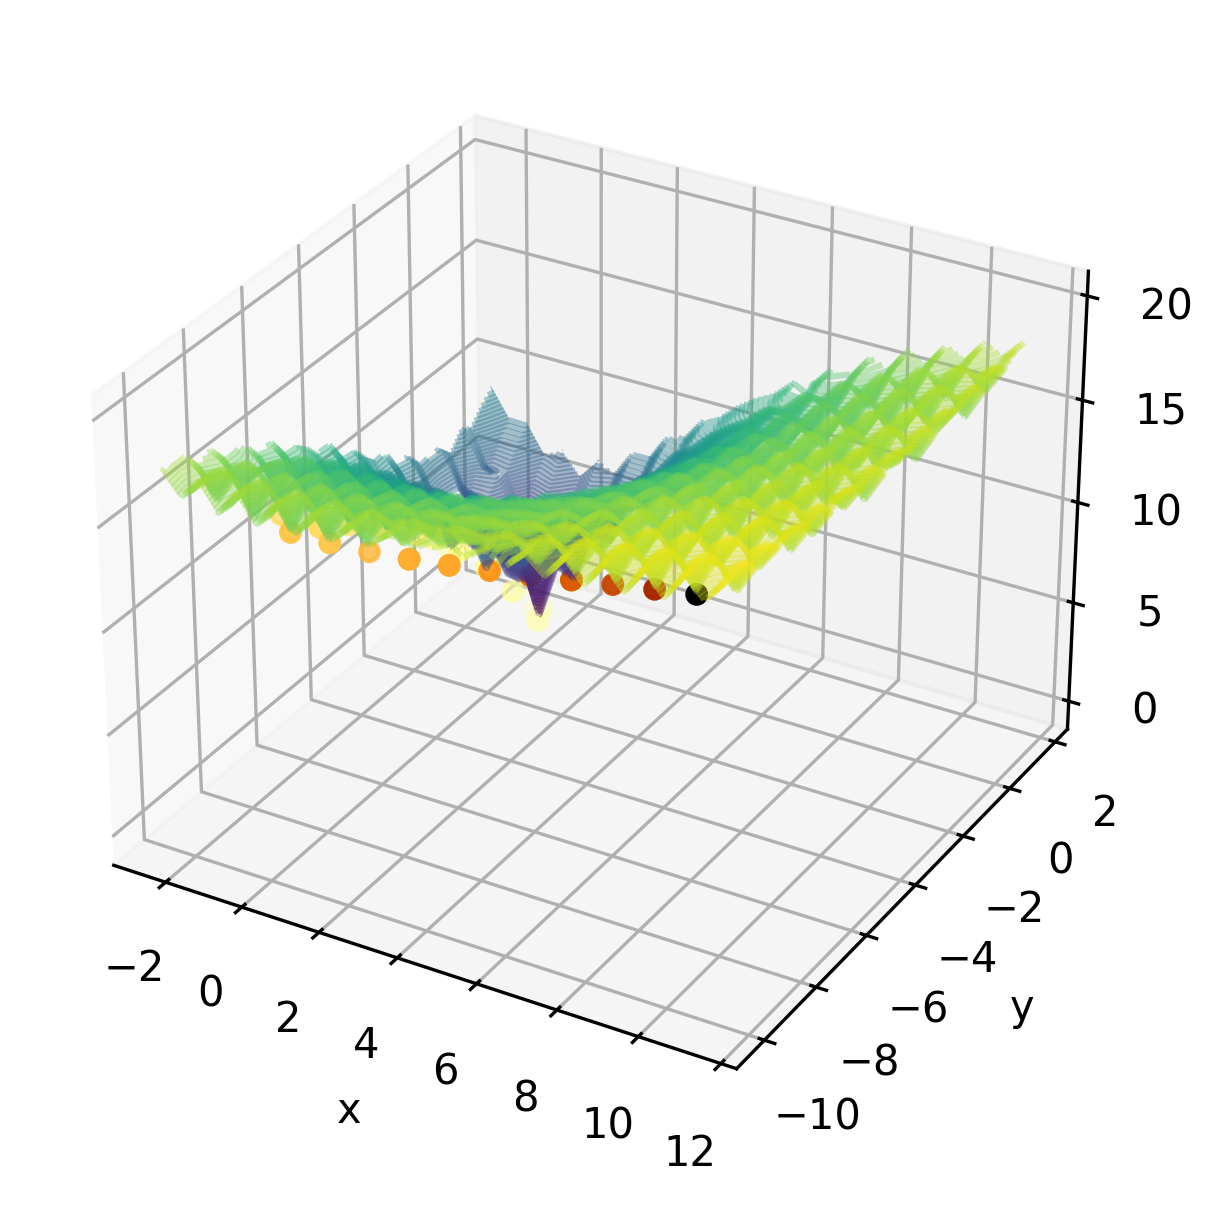

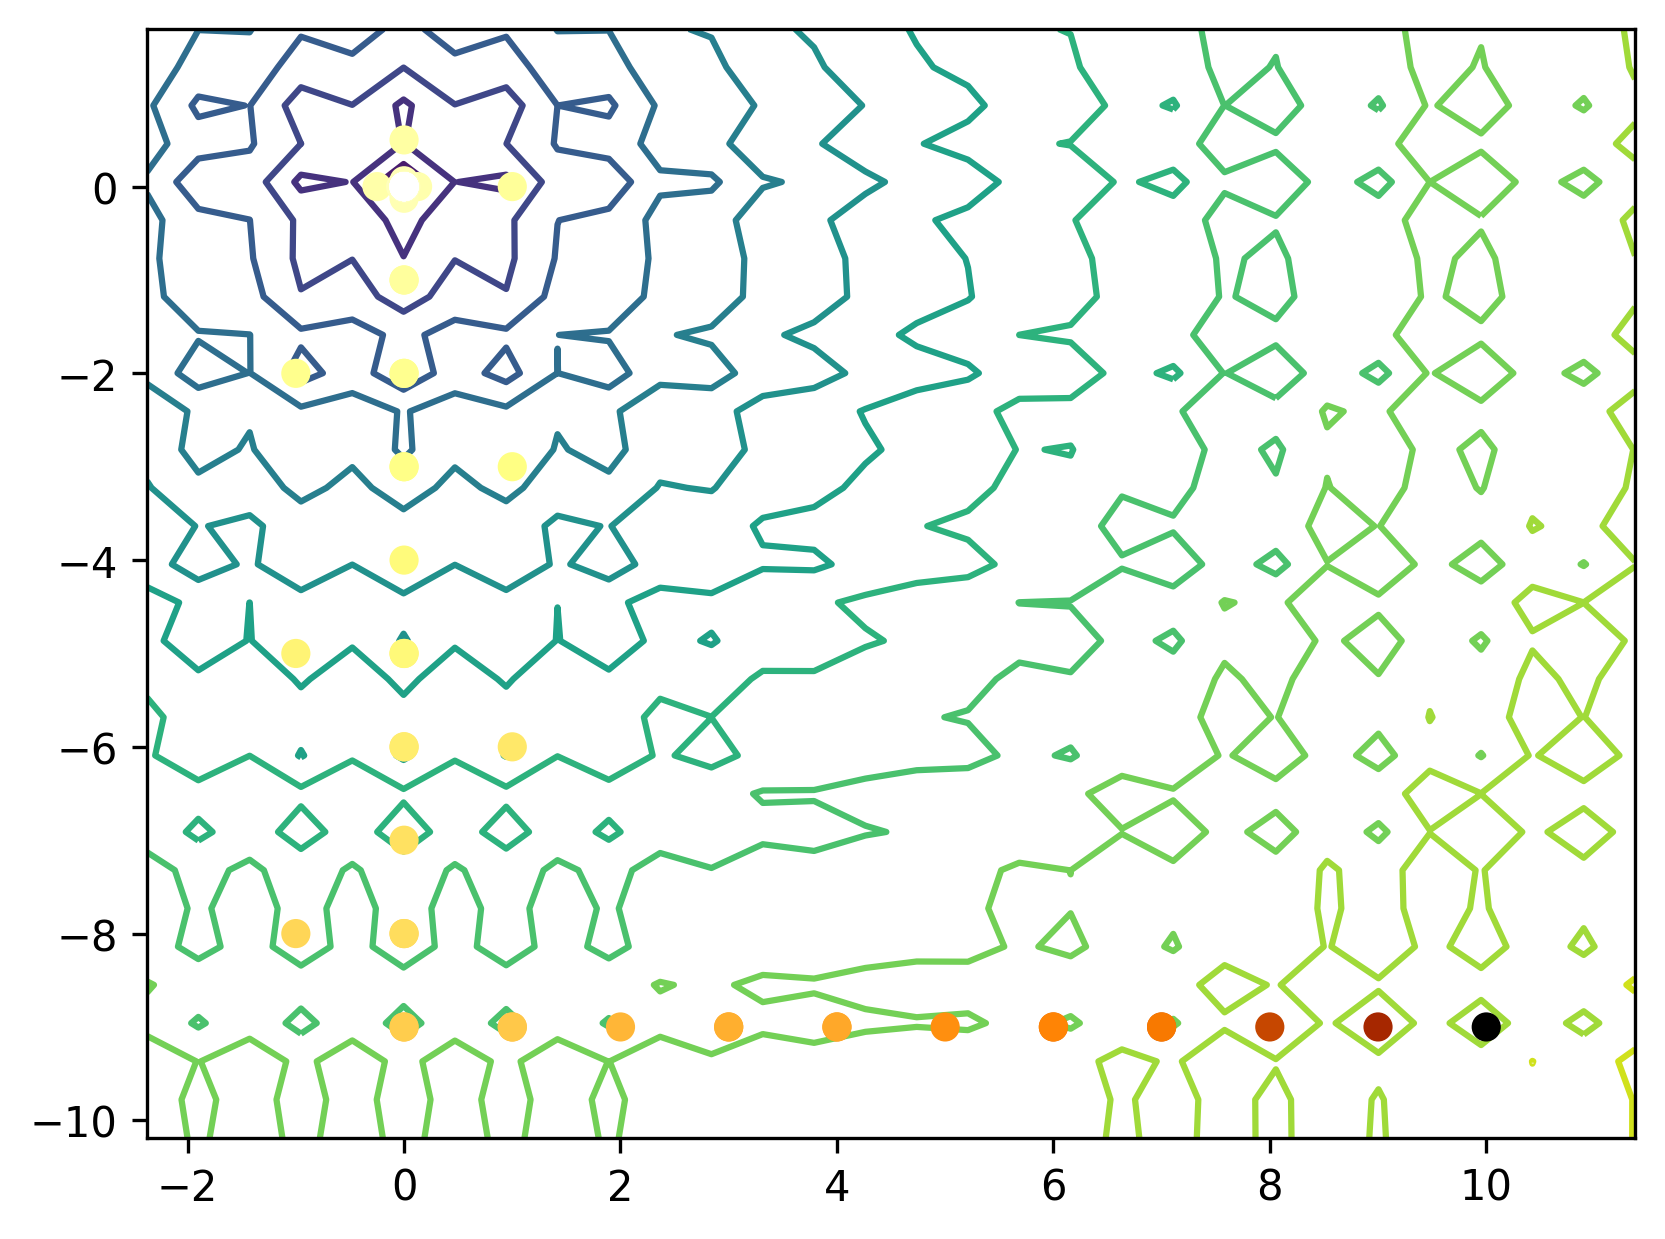

In [11]:
runner = CoordinateDescendImprovedRunner(
    o=Oracle(m1, TARGET),
    start=Vector(9, -9),
    a=Coef.CONST(0.0001),
    exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
)
runner.experiment(False, points=100, plt_cfg=PlotConfig(3, -3, dpi=300))